## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [122]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [123]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [124]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [125]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [126]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [127]:
df.query("landing_page == 'new_page' and group == 'control'").count()[0] + df.query("landing_page == 'old_page' and group == 'treatment'").count()[0]

3893

f. Do any of the rows have missing values?

In [129]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [130]:
# remove row don't match
df.drop(df.query("landing_page == 'new_page' and group == 'control'").index, inplace=True)
df.drop(df.query("landing_page == 'old_page' and group == 'treatment'").index, inplace=True)

In [131]:
# save dataframe
df.to_csv('ab_data_edited.csv', index=False)

In [132]:
# read dataset 
df2 = pd.read_csv('ab_data_edited.csv')

In [133]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [134]:
df2.shape

(290585, 5)

In [135]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [136]:
#number of unique user_ids in the data
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [137]:
#Find Duplicate Rows based on user_id columns
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [139]:
# Select all duplicate rows based on user_id columns 
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [140]:
# drop one duplicate row
df2.drop_duplicates(subset='user_id', keep='last', inplace=True)

In [141]:
#confirm change
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


In [142]:
# confirm correction by checking for duplicates in user_id columns
sum(df2.user_id.duplicated())

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [143]:
# Probability of converting regardless of page
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [144]:
#Given that an individual received the control page, the probability of converting.
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [145]:
#Given that an individual received the treatment page , the probability of converting.
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [146]:
#The probability of receiving the new page.
(df2['landing_page'] == 'new_page').mean()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on the data , there is  no sufficient evidence to say that the new treatment page leads to more conversions becoues proportion of  the control group(0.1204) slightly higher than treatment group(0.1188).**


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.


**Hypotheses:**

$$H_0:p_{old} <= p_{new}$$

$$H_1: p_{new} > p_{old} $$


**we can rearrange our hypothesis to look like this :**

$$H_0: p_{old} - p_{new} <= 0 $$

$$H_1: p_{new} - p_{old} > 0 $$


**The null hypotheses is what we assumed to be true before analyzing any data.** 

**And alternative hypotheses is what we want to prove to be true.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [147]:
#proportion of converting for 𝑝𝑛𝑒𝑤
p_new= df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [148]:
#proportion of converting for 𝑝𝑜𝑙𝑑
p_old= df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$ , the number of individuals in the treatment group ?

In [149]:
#the number of individuals in the treatment group
n_new= df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group ??

In [150]:
#the number of individuals in the control group 
n_old= df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [222]:
# i used numpy's random.binomial function, n would be the number of individuals in the treatment group 
# p would be the conversion rate  
new_page_converted = np.random.binomial(n = n_new, p= p_new)
new_page_converted

17320

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [165]:
# i used numpy's random.binomial function , n would be the number of individuals in the control group 
# p would be the conversion rate
old_page_converted = np.random.binomial(n = n_old, p = p_old)
old_page_converted

17314

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [154]:
#the diffrent between new page converted and old page converted
diffs = new_page_converted/n_new - old_page_converted/n_old
diffs

-0.00012633982460631688

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [168]:
#Simulate 10,000 values to find the diffrent between 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n = n_new,p = p_new)
    old_page_converted = np.random.binomial(n = n_old,p = p_old)
    diffs = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diffs)

In [175]:
#we need to convert p_diffs to numpy array 
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

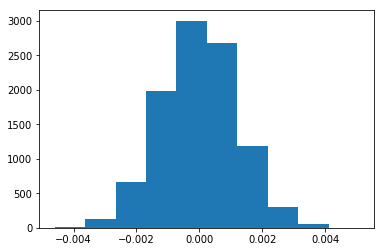

In [223]:
#plot sample distribution 
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [174]:
#proportion of the actual difference
actual_diff = df2.query('group == "treatment"')['converted'].mean()- df2.query('group == "control"')['converted'].mean()
actual_diff

-0.0015782389853555567

In [224]:
# simulate distribution under the null hypothesis
null_values = np.random.normal(0,p_diffs.std(), p_diffs.shape[0])

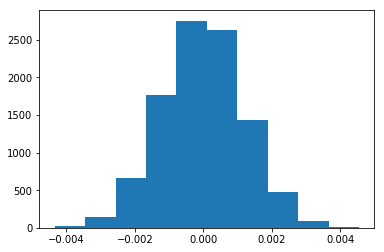

In [225]:
# plot null distribution
plt.hist(null_values);

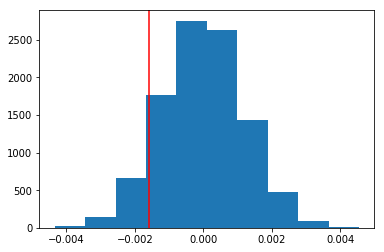

In [226]:
# plot the line for observed statistic
plt.hist(null_values);
plt.axvline(actual_diff,color = 'red')

In [227]:
#compute p-value
(null_values > actual_diff).mean()

0.901

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**I computed proportion of the actual difference and compute p-value**

**This is value called P-value. The definition of a P-value is probability of observing your statistic or one more exterme in favor of the alternative if the null hypothesis is true.**

**p_new - p_old under the null = 0**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [228]:
import statsmodels.api as sm

#calculate the number of conversions for each page
convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
print(convert_old)
print(convert_new)

#the number of individuals who received each page
n_old = df2.query('group == "control"').count()[0]
n_new = df2.query('group == "treatment"').count()[0]


print(n_old)
print(n_new)

17489
17264
145274
145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [229]:
# compute z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger' )

In [230]:
# print z_score
print(z_score)

-1.3109241984234394


In [231]:
# print p_value
print(p_value)

0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score is the number of standard deviations from the mean a data point is.**

**The critical Z score values when using a 95% confidence level are -1.96 and +1.96 standard deviations. The p-value associated with a 95% confidence level is 0.05. If your Z score is between -1.96 and +1.96, your p-value will be larger than 0.05, and you cannot reject your null hypothsis**

**The P-value(0.90) is greater than our type one error rate (0.05),than we fail to reject the null.**

**That is , we stay with the null hypothesis as our decision.**

**And based on these results, it look like e-commerce website should keep the old page.**

**Yes,I agree with the findings in parts j. and k.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [199]:
#Add an intercept column
df2['intercept'] = 1

#add an ab_page column from group column , which is 1 when an individual receives the treatment and 0 if control
df2[['not_ab_page','ab_page']] = pd.get_dummies(df2['group'])

In [200]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,not_ab_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [201]:
#we will drop not_ab_page column , we don't need it 
df2 = df2.drop('not_ab_page',axis=1)

In [202]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [204]:
# import statsmodels
import statsmodels.api as sm 

#instantiate the model, and fit the model using intercept and ab_page columns 
#to predict whether or not an individual converts.
logit_model = sm.Logit(df2['converted'], df2 [['intercept','ab_page']])

In [205]:
logit_model

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [206]:
# the summary of model
results = logit_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 May 2019   Pseudo R-squ.:               8.077e-06
Time:                        05:34:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.190.**


**The p-value here is a two-tailed test and the p-value in Part II is a one-tail test.**

**p-value from Part 2 was 0.905 and  p-value from the logistic model was 0.19. 
So 0.19 by 2 to look at one tail only (0.095).
Then 1- 0.095 = 0.905**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It's importent to know what is things that might influence whether or not an individual converts.These idea will help us to make a decision.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [207]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [213]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [209]:
#display unique value in country column
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [211]:
#display number of values in country column
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

**The most common country value is US**

In [235]:
### Create the necessary dummy variables
df_new[['US','UK']] = pd.get_dummies(df_new['country'])[['US','UK']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [239]:
### Fit Your Linear Model And Obtain the Results
logit_m_country = sm.Logit(df_new['converted'], df_new[['intercept','ab_page','US','UK']])
results = logit_m_country.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 07 May 2019   Pseudo R-squ.:               2.323e-05
Time:                        10:39:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

Type I error = 0.05

And based on these results, the p-values are greater than Type I error , there is no a statistically significant
between the country  and conversion.

p-value for US is (0.130) > 0.05 
p-value for UK is (0.074) > 0.05 

Since p-value is greater than 0.05.So we fail to reject the null hyphothesis.




<a id='conclusions'></a>
## Conclusions

> ### Part II

**The P-value(0.90) is greater than our type one error rate (0.05),than we fail to reject the null.**

**That is , we stay with the null hypothesis as our decision.**

**And based on these results, it look like e-commerce website should keep the old page.**

>### Part III

**And based on these results, the p-values are greater than Type I error , there is no a statistically significant
between the country  and conversion.
Since p-value is greater than 0.05.So we fail to reject the null hyphothesis.**


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.


### References

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

https://www.statsmodels.org/devel/generated/statsmodels.stats.proportion.proportions_ztest.html


http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm

https://knowledge.udacity.com/?nanodegree=5d1a8326-496f-11e8-b51d-0b52a2c1b841&page=1&project=56f678d8-496f-11e8-b3a8-5b814806136d&sort=RECENT